## Aggregation of token training using LLM2Vec with Mistral

In [63]:
import os, json

file_path = "../output/llm2vec_mistral/"

os.listdir(file_path)

['_full_sentence_majo_scopes_2_5e-05_0.1',
 '_full_sentence_majo_total_2_5e-05_0.1',
 'token_mistral_scopes_2_0.00012_0.2',
 'token_mistral_scopes_1_5e-05_0.1',
 'token_mistral_scopes_2_1e-05_0.0',
 'token_mistral_scopes_2_5e-05_0.15',
 'token_mistral_scopes_4_6e-05_0.15',
 'token_mistral_scopes_4_6e-05_0.1',
 'token_mistral_scopes_4_0.00012_0.22',
 'token_mistral_scopes_1_8e-05_0.2',
 'token_mistral_scopes_1_0.0001_0.22',
 'token_mistral_scopes_4_0.00012_0.25',
 'token_mistral_scopes_4_6e-05_0.18',
 'token_mistral_scopes_1_5e-05_0.15',
 '_full_sentence_majo_total_2_5e-05_0.0',
 'token_mistral_scopes_2_5e-05_0.12',
 'token_mistral_scopes_4_2e-05_0.25',
 'token_mistral_scopes_4_5e-05_0.15',
 'token_mistral_scopes_2_5e-05_0.0',
 'token_mistral_scopes_1_2e-05_0.12',
 'token_mistral_scopes_2_5e-05_0.1',
 'token_mistral_scopes_4_8e-05_0.1',
 '_full_sentence_majo_total_2_1e-04_0.0',
 'token_mistral_scopes_2_4e-05_0.25',
 'token_mistral_scopes_1_0.0001_0.25',
 '_full_sentence_majo_scopes_2_1e

In [64]:
import pandas as pd
json_data=[]
for fp in os.listdir(file_path):
    if fp.split('_')[0:3]==["token",'mistral','scopes']:
        print()
        print(fp)
        fp_path=os.path.join(file_path,fp)
        #print(fp_path)
        json_list=os.listdir(fp_path)
        json_list=sorted(json_list)
        arr=[[] for _ in range(2)]
        for i in range(len(json_list)):
            js=json_list[i]
            if js.split('.')[0]=='model_setup':
                arr[0].append(js)
            elif js.split('_')[0]=='eval':
                arr[1].append(js)
        print(arr)# split json files 3types
        tmp_dict={}
        for i in range(len(json_list)):
            js=json_list[i]
            #print(os.path.join(fp_path,js))
            json_path=os.path.join(fp_path,js)
            with open(json_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                if js==arr[0][0]:#Metadata of model
                    tmp_dict.update(data)
                    print(data)
                if len(arr[1])>=3:#eval_metrics
                    js=arr[1][-3]                
                    tmp_dict.update(data)
                    print(data)
                elif len(arr[1])<3:
                    js=arr[1][0]
                    tmp_dict.update(data)
                    print(data)
        print(tmp_dict)
        json_data.append(tmp_dict)

print()
print("result")
print(json_data)


token_mistral_scopes_2_0.00012_0.2
[['model_setup.json'], ['eval_metrics1.json', 'eval_metrics2.json', 'eval_metrics3.json', 'eval_metrics4.json', 'eval_metrics5.json', 'eval_metrics6.json', 'eval_metrics7.json']]
{'loss': 1.15625, 'acc': 0.5991753339767456, 'macro_f1': 0.41711002588272095, 'total_f1': 0.70745450258255, 'inf_f1': 0.4832434058189392, 'perc_f1': 0.11432706564664841, 'backg_f1': 0.28249043226242065}
{'loss': 1.1953125, 'acc': 0.5633375644683838, 'macro_f1': 0.4116396903991699, 'total_f1': 0.7124139666557312, 'inf_f1': 0.4624405801296234, 'perc_f1': 0.1296619027853012, 'backg_f1': 0.29765716195106506}
{'loss': 1.140625, 'acc': 0.5460554361343384, 'macro_f1': 0.4267534911632538, 'total_f1': 0.7134777903556824, 'inf_f1': 0.46228957176208496, 'perc_f1': 0.23306232690811157, 'backg_f1': 0.2731291949748993}
{'loss': 1.1953125, 'acc': 0.5167667269706726, 'macro_f1': 0.42322468757629395, 'total_f1': 0.7152849435806274, 'inf_f1': 0.4151152968406677, 'perc_f1': 0.32367148995399475

In [65]:
import numpy as np
df_json=pd.DataFrame(json_data).replace("None", np.nan)

In [66]:
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,...,test_total_f1,test_inf_f1,test_perc_f1,test_backg_f1,val_acc,val_macro_f1,val_total_f1,val_inf_f1,val_perc_f1,val_backg_f1
0,2.796875,0.579043,0.240615,0.205313,0.131609,0.087692,0.000000,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.085938,0.537323,0.456794,0.724029,0.530484,0.258731,0.337054,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.148438,0.646171,0.538980,0.740327,0.605932,0.375301,0.369486,False,token_mistral,scopes,...,0.723055,0.53886,0.354499,0.064455,0.565399,0.432725,0.731474,0.534177,0.357609,0.082083
3,1.070312,0.564126,0.520051,0.735076,0.632151,0.378087,0.361795,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.992188,0.663210,0.552427,0.740476,0.646341,0.415147,0.332659,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.539062,0.675944,0.550135,0.751203,0.633968,0.398345,0.336264,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.078125,0.532654,0.477851,0.720205,0.545455,0.329620,0.355301,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.398438,0.443575,0.220916,0.451415,0.007078,0.220490,0.014770,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.226562,0.531563,0.426737,0.703279,0.456539,0.196675,0.334726,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.031250,0.527075,0.481631,0.716160,0.592155,0.292308,0.389144,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


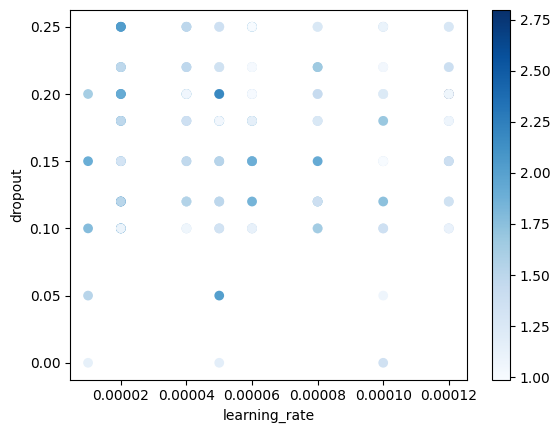

In [67]:
import matplotlib.pyplot as plt

plt.scatter(data = df_json, x = 'learning_rate', y = 'dropout', c = 'loss', cmap = 'Blues')
plt.xlabel('learning_rate')
plt.ylabel('dropout')
plt.colorbar()

### Results of token training using LLM2Vec with Mistral

In [68]:
df_json=df_json.sort_values(['total_f1','macro_f1'],ignore_index=True, ascending=False)
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,...,test_total_f1,test_inf_f1,test_perc_f1,test_backg_f1,val_acc,val_macro_f1,val_total_f1,val_inf_f1,val_perc_f1,val_backg_f1
0,1.492188,0.677642,0.573167,0.789583,0.649618,0.464470,0.342408,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.726562,0.689891,0.594093,0.778955,0.662814,0.465255,0.414599,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.445312,0.674550,0.570546,0.774506,0.641637,0.429217,0.382469,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.460938,0.666485,0.574544,0.774015,0.638430,0.441607,0.394109,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.406250,0.640834,0.551458,0.769281,0.637333,0.384060,0.384394,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.125000,0.710691,0.605483,0.769068,0.674712,0.496156,0.406488,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.031250,0.700200,0.599438,0.768187,0.672543,0.497780,0.389155,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.960938,0.698199,0.600316,0.767982,0.677086,0.452320,0.436295,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.988281,0.617185,0.534154,0.767697,0.615354,0.375669,0.365743,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.929688,0.693045,0.596188,0.767316,0.690408,0.457779,0.404317,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_json=df_json.sort_values(['macro_f1','total_f1','acc'],ignore_index=True, ascending=False)
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,...,test_total_f1,test_inf_f1,test_perc_f1,test_backg_f1,val_acc,val_macro_f1,val_total_f1,val_inf_f1,val_perc_f1,val_backg_f1
0,1.890625,0.706082,0.606348,0.764421,0.676614,0.478281,0.432413,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.125000,0.710691,0.605483,0.769068,0.674712,0.496156,0.406488,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.960938,0.698199,0.600316,0.767982,0.677086,0.452320,0.436295,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.031250,0.700200,0.599438,0.768187,0.672543,0.497780,0.389155,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.796875,0.691044,0.598888,0.764231,0.704324,0.464708,0.397792,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.929688,0.693045,0.596188,0.767316,0.690408,0.457779,0.404317,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.078125,0.702504,0.594327,0.757136,0.669870,0.483190,0.384308,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.726562,0.689891,0.594093,0.778955,0.662814,0.465255,0.414599,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.062500,0.692438,0.591170,0.760015,0.684032,0.467093,0.381002,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.468750,0.685283,0.590339,0.754670,0.674302,0.493584,0.369024,False,token_mistral,scopes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
print("Best batch_size and max_epochs")
df_json.iloc[0]

Best batch_size and max_epochs


loss                    1.890625
acc                     0.706082
macro_f1                0.606348
total_f1                0.764421
inf_f1                  0.676614
perc_f1                 0.478281
backg_f1                0.432413
full_training              False
segment            token_mistral
mode                      scopes
model_name       llm2vec_mistral
batch_size                     4
max_epoch                     20
learning_rate            0.00005
dropout                     0.18
test_epoch                   NaN
test_acc                     NaN
test_f1                      NaN
test_total_f1                NaN
test_inf_f1                  NaN
test_perc_f1                 NaN
test_backg_f1                NaN
val_acc                      NaN
val_macro_f1                 NaN
val_total_f1                 NaN
val_inf_f1                   NaN
val_perc_f1                  NaN
val_backg_f1                 NaN
Name: 0, dtype: object

## Aggregation of full training using LLM2Vec with Mistral

In [71]:
json_data=[]
for fp in os.listdir(file_path):
    if fp.split('_')[1:2]==['full']:
        print()
        print(fp)
        fp_path=os.path.join(file_path,fp)
        #print(fp_path)
        json_list=os.listdir(fp_path)
        json_list=sorted(json_list)
        arr=[[] for _ in range(2)]
        for i in range(len(json_list)):
            js=json_list[i]
            if js.split('.')[0]=='model_setup':
                arr[0].append(js)
            elif js.split('_')[0]=='eval':
                arr[1].append(js)
        print(arr)# split json files 3types
        tmp_dict={}
        for i in range(len(json_list)):
            js=json_list[i]
            #print(os.path.join(fp_path,js))
            json_path=os.path.join(fp_path,js)
            with open(json_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                if js==arr[0][0]:#Metadata of model
                    tmp_dict.update(data)
                    print(data)
                if js==arr[1][-3]:#eval_metrics
                    tmp_dict.update(data)
                    print(data)
        print(tmp_dict)
        json_data.append(tmp_dict)

print()
print("result")
print(json_data)


_full_sentence_majo_scopes_2_5e-05_0.1
[['model_setup.json'], ['eval_metrics1.json', 'eval_metrics2.json', 'eval_metrics3.json', 'eval_metrics4.json', 'eval_metrics5.json']]
{'loss': 1.1015625, 'acc': 0.6283906102180481, 'macro_f1': 0.5210378170013428, 'total_f1': 0.706131100654602, 'inf_f1': 0.4736842215061188, 'perc_f1': 0.45505619049072266, 'backg_f1': 0.375}
{'full_training': True, 'segment': 'sentence_majo', 'mode': 'scopes', 'model_name': 'llm2vec_mistral', 'batch_size': 2, 'max_epoch': 20, 'learning_rate': 5e-05, 'dropout': 0.1}
{'loss': 1.1015625, 'acc': 0.6283906102180481, 'macro_f1': 0.5210378170013428, 'total_f1': 0.706131100654602, 'inf_f1': 0.4736842215061188, 'perc_f1': 0.45505619049072266, 'backg_f1': 0.375, 'full_training': True, 'segment': 'sentence_majo', 'mode': 'scopes', 'model_name': 'llm2vec_mistral', 'batch_size': 2, 'max_epoch': 20, 'learning_rate': 5e-05, 'dropout': 0.1}

_full_sentence_majo_total_2_5e-05_0.1
[['model_setup.json'], ['eval_metrics1.json', 'eval

In [72]:
df_json=pd.DataFrame(json_data).replace("None", np.nan)
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,model_name,batch_size,max_epoch,learning_rate,dropout
0,1.101562,0.628391,0.521038,0.706131,0.473684,0.455056,0.375000,True,sentence_majo,scopes,llm2vec_mistral,2,20,0.00005,0.1
1,0.644531,0.773960,NaN,0.740664,NaN,NaN,NaN,True,sentence_majo,total,llm2vec_mistral,2,20,0.00005,0.1
2,0.466797,0.775769,NaN,0.718821,NaN,NaN,NaN,True,sentence_majo,total,llm2vec_mistral,2,10,5e-05,0.0
3,0.515625,0.754973,NaN,0.702525,NaN,NaN,NaN,True,sentence_majo,total,llm2vec_mistral,2,10,1e-04,0.0
4,1.179688,0.644665,0.436745,0.644205,0.374269,0.327138,0.225166,True,sentence_majo,scopes,llm2vec_mistral,2,10,1e-04,0.0
5,1.031250,0.649938,0.555324,0.744771,0.640056,0.402135,0.374839,True,token_mistral,scopes,llm2vec_mistral,2,10,5e-05,0.0
6,0.582031,0.743520,NaN,0.678556,NaN,NaN,NaN,True,token_mistral,total,llm2vec_mistral,2,10,0.00001,0.0
7,1.085938,0.668271,0.576426,0.739184,0.686048,0.442493,0.366018,True,token_mistral,scopes,llm2vec_mistral,2,20,0.00005,0.1
8,2.015625,0.719711,0.565852,0.716352,0.929385,0.228916,0.299320,True,sentence_prio,scopes,llm2vec_mistral,2,10,5e-05,0.0
9,1.070312,0.628391,0.481758,0.690083,0.773148,0.158730,0.236311,True,sentence_prio,scopes,llm2vec_mistral,2,10,1e-04,0.0


### Results of full training using LLM2Vec with Mistal

In [73]:
df_json=df_json.sort_values(['macro_f1','total_f1','acc'],ignore_index=True, ascending=False)
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,model_name,batch_size,max_epoch,learning_rate,dropout
0,1.085938,0.668271,0.576426,0.739184,0.686048,0.442493,0.366018,True,token_mistral,scopes,llm2vec_mistral,2,20,0.00005,0.1
1,2.015625,0.719711,0.565852,0.716352,0.929385,0.228916,0.299320,True,sentence_prio,scopes,llm2vec_mistral,2,10,5e-05,0.0
2,1.031250,0.649938,0.555324,0.744771,0.640056,0.402135,0.374839,True,token_mistral,scopes,llm2vec_mistral,2,10,5e-05,0.0
3,1.765625,0.671784,0.550329,0.723349,0.655449,0.399321,0.321303,True,token_mistral,scopes,llm2vec_mistral,2,10,0.00001,0.0
4,1.835938,0.660036,0.549005,0.712018,0.602041,0.440129,0.344828,True,sentence_majo,scopes,llm2vec_mistral,2,10,5e-05,0.0
5,1.570312,0.647635,0.544920,0.723069,0.626352,0.396134,0.357826,True,token_mistral,scopes,llm2vec_mistral,2,10,1e-04,0.0
6,1.101562,0.628391,0.521038,0.706131,0.473684,0.455056,0.375000,True,sentence_majo,scopes,llm2vec_mistral,2,20,0.00005,0.1
7,1.632812,0.721519,0.498343,0.664132,0.855856,0.132353,0.191388,True,sentence_prio,scopes,llm2vec_mistral,2,20,0.00005,0.1
8,1.070312,0.628391,0.481758,0.690083,0.773148,0.158730,0.236311,True,sentence_prio,scopes,llm2vec_mistral,2,10,1e-04,0.0
9,1.179688,0.644665,0.436745,0.644205,0.374269,0.327138,0.225166,True,sentence_majo,scopes,llm2vec_mistral,2,10,1e-04,0.0


In [74]:
df_json=df_json.sort_values(['total_f1','acc'],ignore_index=True, ascending=False)
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,model_name,batch_size,max_epoch,learning_rate,dropout
0,1.031250,0.649938,0.555324,0.744771,0.640056,0.402135,0.374839,True,token_mistral,scopes,llm2vec_mistral,2,10,5e-05,0.0
1,0.644531,0.773960,NaN,0.740664,NaN,NaN,NaN,True,sentence_majo,total,llm2vec_mistral,2,20,0.00005,0.1
2,0.644531,0.773960,NaN,0.740664,NaN,NaN,NaN,True,sentence_prio,total,llm2vec_mistral,2,20,0.00005,0.1
3,1.085938,0.668271,0.576426,0.739184,0.686048,0.442493,0.366018,True,token_mistral,scopes,llm2vec_mistral,2,20,0.00005,0.1
4,0.574219,0.775769,NaN,0.726872,NaN,NaN,NaN,True,sentence_prio,total,llm2vec_mistral,2,10,5e-05,0.0
5,0.486328,0.763565,NaN,0.726122,NaN,NaN,NaN,True,token_mistral,total,llm2vec_mistral,2,20,0.00005,0.1
6,1.765625,0.671784,0.550329,0.723349,0.655449,0.399321,0.321303,True,token_mistral,scopes,llm2vec_mistral,2,10,0.00001,0.0
7,1.570312,0.647635,0.544920,0.723069,0.626352,0.396134,0.357826,True,token_mistral,scopes,llm2vec_mistral,2,10,1e-04,0.0
8,0.466797,0.775769,NaN,0.718821,NaN,NaN,NaN,True,sentence_majo,total,llm2vec_mistral,2,10,5e-05,0.0
9,2.015625,0.719711,0.565852,0.716352,0.929385,0.228916,0.299320,True,sentence_prio,scopes,llm2vec_mistral,2,10,5e-05,0.0


In [75]:
print("Best parameters for full training")
df_json.iloc[0]

Best parameters for full training


loss                     1.03125
acc                     0.649938
macro_f1                0.555324
total_f1                0.744771
inf_f1                  0.640056
perc_f1                 0.402135
backg_f1                0.374839
full_training               True
segment            token_mistral
mode                      scopes
model_name       llm2vec_mistral
batch_size                     2
max_epoch                     10
learning_rate              5e-05
dropout                      0.0
Name: 0, dtype: object